In [1]:
import os
# from numba import jit
# from tqdm import tqdm

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from matplotlib import cm
from matplotlib.cm import ScalarMappable

# from my_utilities.data import get_data
from my_utilities.data import get_phipsi_dict_from_dataframe
from my_utilities.ramachandran import get_ramachandran, plot_ramachandran
from my_utilities.svd import SVD_representation
# from my_utilities.density.vec import get_trivial_vec_density, get_linear_interpolator
# from my_utilities.metrics import log_likelihood

from my_utilities.constants import aminoacid_name_from_1l

In [2]:
def heatmap(rama, logscale=False, saveto=None):
  
    arr = np.log(rama) if logscale else rama
    norm = colors.Normalize(vmin=-10, vmax=10) if logscale else None

    fig, ax = plt.subplots(figsize=(4,4))
    ax.imshow(np.transpose(arr),
              norm=norm,
              origin="lower")
    n = rama.shape[0]
    ax.set_xticks(ticks=[-0.5,n/2-0.5,n-0.5], labels=["$-\pi$", "0", "$\pi$"])
    ax.set_yticks(ticks=[-0.5,n/2-0.5,n-0.5], labels=["$-\pi$", "0", "$\pi$"])
    # ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False, length=0)
    
    if logscale:
        scmap = ScalarMappable(norm=norm)
    else:
        scmap = ScalarMappable(norm=None)
        scmap.set_array(arr)
        scmap.autoscale() 
    
    fig.colorbar(scmap, cmap=None, ax=ax, fraction=0.046, pad=0.04)
    
    if saveto is not None:
        plt.savefig(saveto, bbox_inches='tight', pad_inches=0.001)
    else:
        plt.show()

In [3]:
data = pd.read_pickle("./my_cache/aa_ramachandran_data.pkl")
# phipsidict = get_phipsi_dict_from_dataframe(data)

In [4]:
EXCLUDED_VOLUME_MASK_PATH = "./pyrosetta/exclmap32_30.csv"
excluded_volume_mask = ~pd.read_csv(EXCLUDED_VOLUME_MASK_PATH).to_numpy()

In [5]:
AA = "V"
PP = False

In [6]:
rama, n_bins, dx, points = get_ramachandran(data, AA, PP, n_bins=32, pseudocount=0, norm=False)

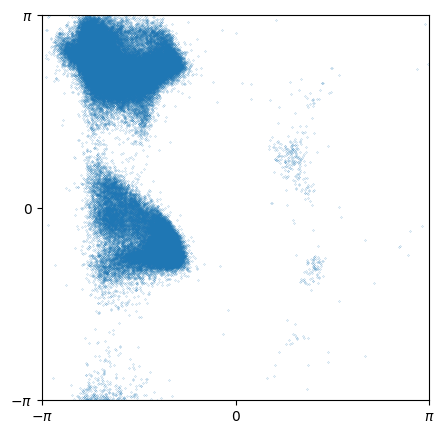

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(points["phi"], points["psi"], s=0.02)
plt.xlim(-np.pi,np.pi)
plt.ylim(-np.pi,np.pi)
plt.xticks(ticks=[-np.pi,0,np.pi], labels=["$-\pi$", "0", "$\pi$"])
plt.yticks(ticks=[-np.pi,0,np.pi], labels=["$-\pi$", "0", "$\pi$"])
plt.show()

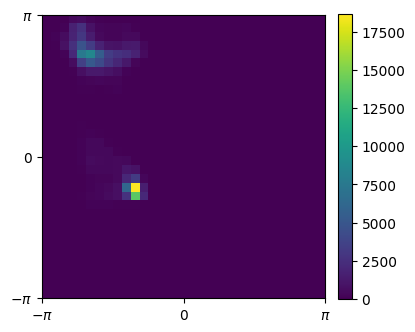

In [8]:
heatmap(rama)

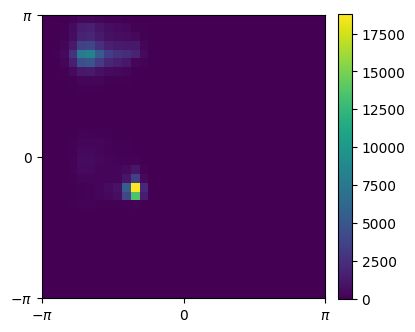

In [9]:
heatmap(SVD_representation(rama, 2))

## Logscale

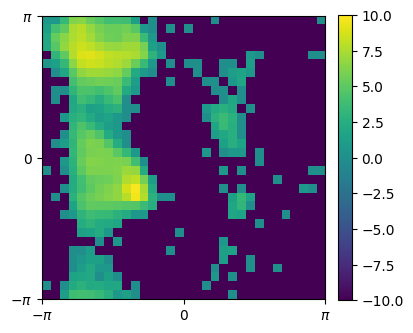

In [10]:
a = rama
b = np.where(a > 0, a, 0.00000000000000000001) # remove negative values, add pseudocount
heatmap(b, logscale=True)

In [13]:
b.max()

18647.0

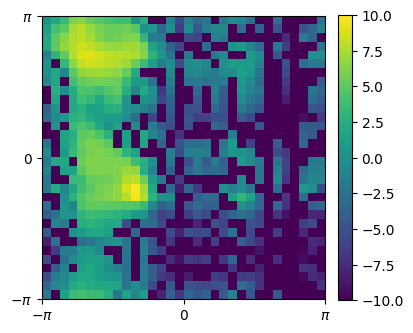

In [14]:
a = SVD_representation(rama, 8)
b = np.where(a > 0, a, 0.00000000000000000001) # remove negative values, add pseudocount
heatmap(b, logscale=True)

## New: test -- SVD od logplot

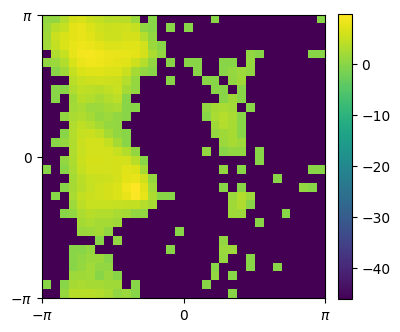

In [17]:
ramalog = np.log(b)
heatmap(ramalog)

In [24]:
hist_svd = SVD_representation(ramalog, 8) #* excluded_volume_mask 
ramalogsvd = np.where(hist_svd > 0, hist_svd, 0.00000000000000000001)

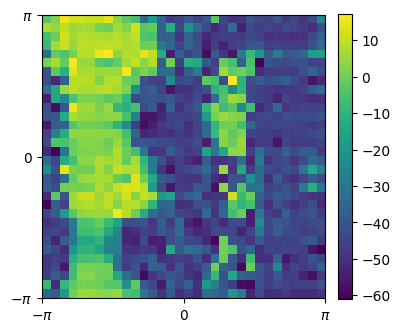

In [25]:
heatmap(hist_svd)

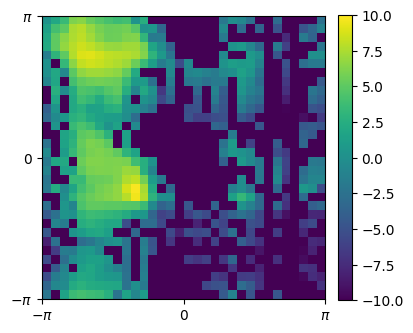

In [17]:
a = SVD_representation(rama, 8) * excluded_volume_mask
b = np.where(a > 0, a, 0.00000000000000000001) # remove negative values, add pseudocount
heatmap(b, logscale=True)

In [18]:
hist_svd = SVD_representation(rama, 12) * excluded_volume_mask 
# remove negative values, add pseudocount
hist_svd = np.where(hist_svd > 0, hist_svd, 0.00000000000000000001)

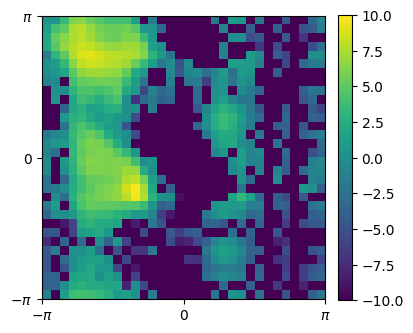

In [19]:
heatmap(hist_svd, logscale=True)

##                                                                        

In [20]:
AA = "L"
PP = False

In [27]:
plot_dir = "./thesis_plots"

In [29]:
!mkdir thesis_plots

In [38]:
for aa in  ["L","A","G","V","E","D"]:
    print(aminoacid_name_from_1l(aa))

Leucine
Alanine
Glycine
Valine
Glutamic acid
Aspartic acid


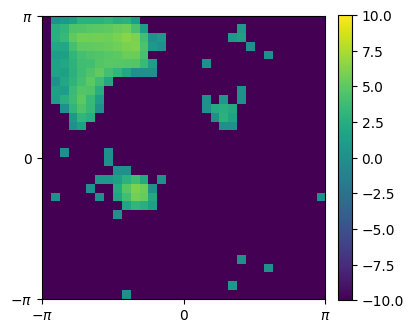

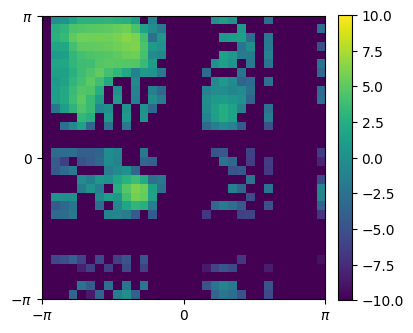

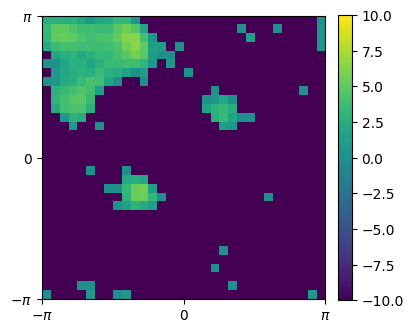

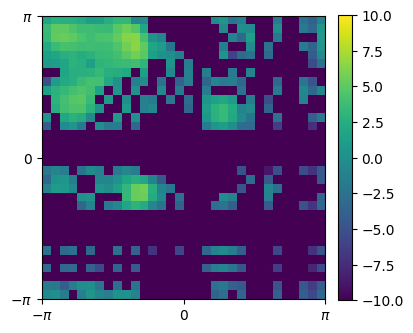

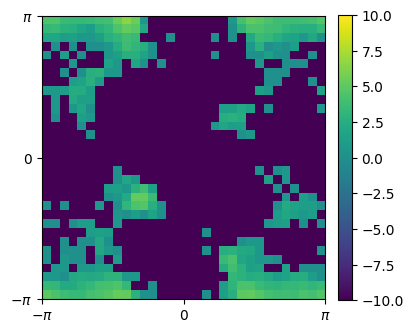

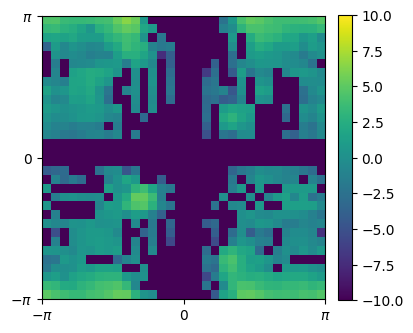

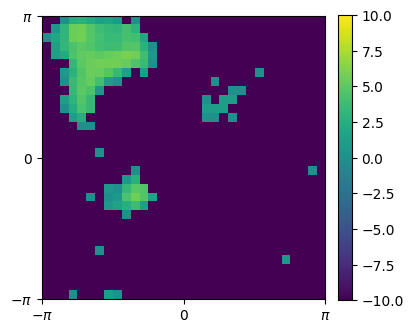

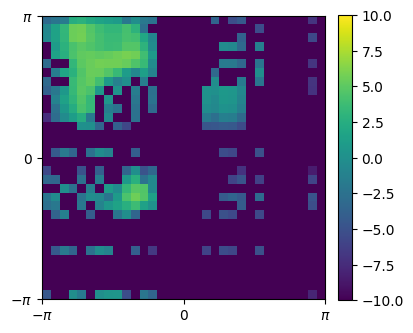

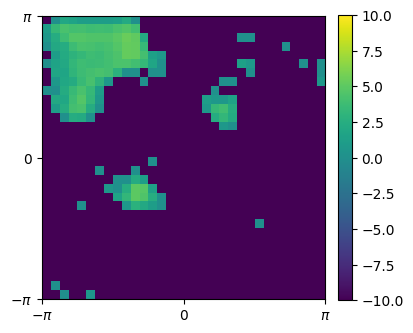

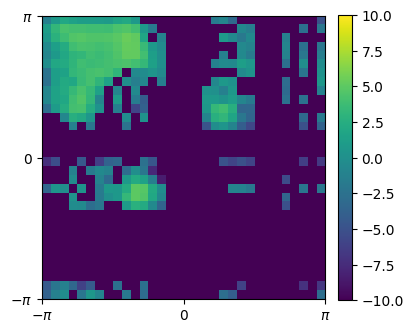

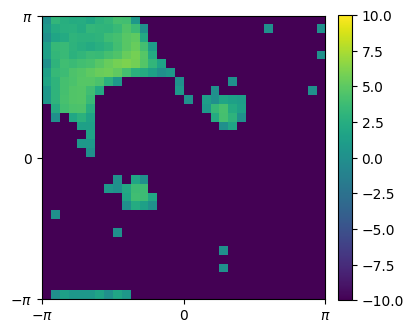

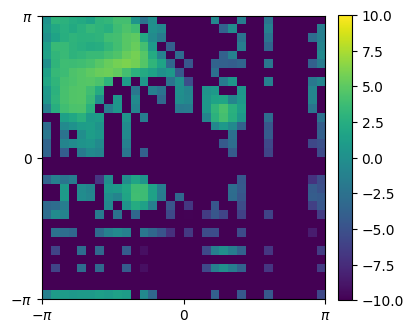

In [39]:
PP = True

for AA in ["L","A","G","V","E","D"]:
    
    
    rama, n_bins, dx, points = get_ramachandran(data, AA, PP, n_bins=32, pseudocount=0, norm=False)

    rama = np.where(rama > 0, rama, 0.00000000000000000001) # remove negative values, add pseudocount
    heatmap(rama, logscale=True, saveto=f"{plot_dir}/rama32_{AA}_{pp_text}_original.png")

    hist_svd = SVD_representation(rama, 8) * excluded_volume_mask 
    hist_svd = np.where(hist_svd > 0, hist_svd, 0.00000000000000000001)
    heatmap(hist_svd, logscale=True, saveto=f"{plot_dir}/rama32_{AA}_{pp_text}_SVD8.png")

L, True, original


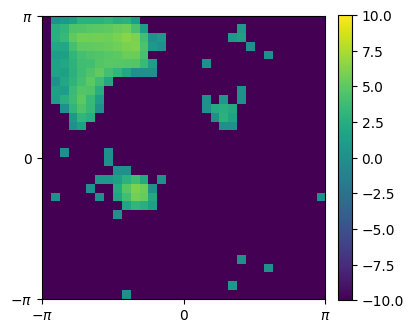

L, True, SVD


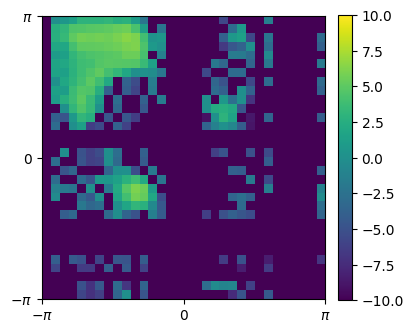

A, True, original


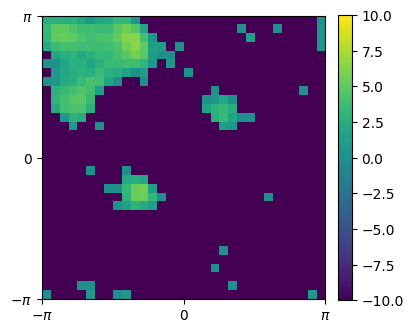

A, True, SVD


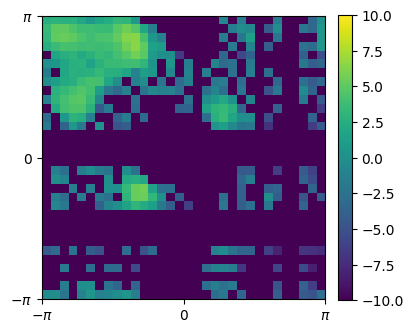

G, True, original


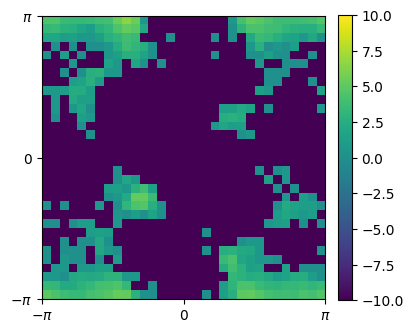

G, True, SVD


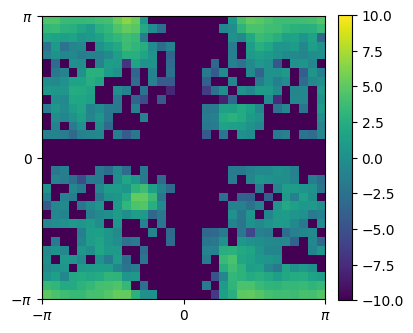

V, True, original


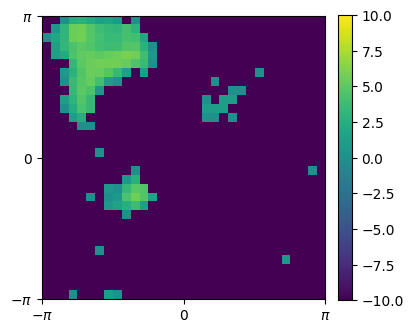

V, True, SVD


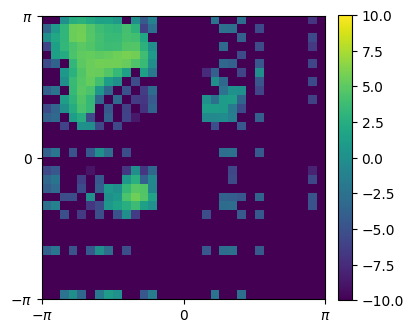

E, True, original


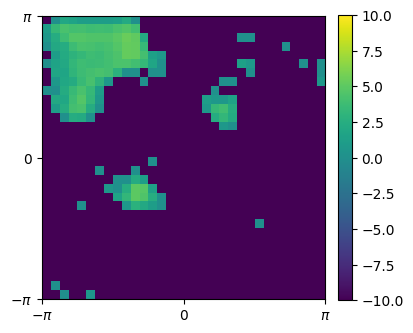

E, True, SVD


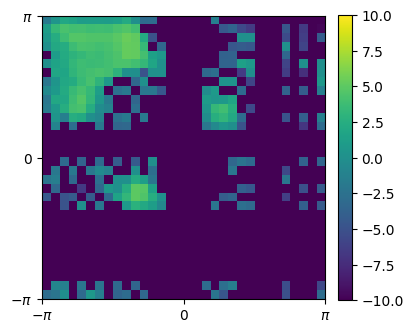

D, True, original


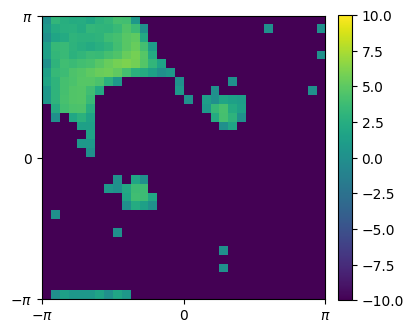

D, True, SVD


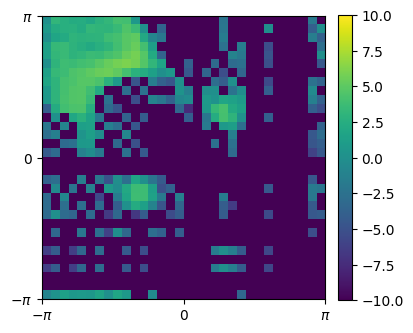

In [21]:
PP = True

for AA in ["L","A","G","V","E","D"]:
    
    rama, n_bins, dx, points = get_ramachandran(data, AA, PP, n_bins=32, pseudocount=0, norm=False)

    rama = np.where(rama > 0, rama, 0.00000000000000000001)
    print(f"{AA}, {PP}, original") 
    heatmap(rama, logscale=True)

    hist_svd = SVD_representation(rama, 12) * excluded_volume_mask 
    # remove negative values, add pseudocount
    hist_svd = np.where(hist_svd > 0, hist_svd, 0.00000000000000000001)
    print(f"{AA}, {PP}, SVD") 
    heatmap(hist_svd, logscale=True)

In [ ]:
SVD_representation(rama, 12) * excluded_volume_mask 

In [ ]:
hist_svd = SVD_representation(rama, 12) * excluded_volume_mask 
# remove negative values, add pseudocount
hist_svd = np.where(hist_svd > 0, hist_svd, 0.1)
# normalize
hist_svd /= np.sum(hist_svd) * (2 * np.pi / n)**2
svd_representations[aa,ifpp,n,d] = hist_svd

In [126]:
!ls pyrosetta/excl*

pyrosetta/exclmap128_30.csv  pyrosetta/exclmap256.csv
pyrosetta/exclmap128.csv     pyrosetta/exclmap32_30.csv
pyrosetta/exclmap16_30.csv   pyrosetta/exclmap32.csv
pyrosetta/exclmap256_15.csv  pyrosetta/exclmap64_30.csv
pyrosetta/exclmap256_20.csv  pyrosetta/exclmap64.csv
pyrosetta/exclmap256_30.csv  pyrosetta/excluded_volume_map.csv


In [123]:
ramalog = np.log(rama)
ramalog.shape
# plt.hist(np.log(rama).flatten(), bins=100)

/tmp/ipykernel_711701/775565013.py:1: RuntimeWarning: divide by zero encountered in log
  ramalog = np.log(rama)


(32, 32)

(array([1000.,   15.,    4.,    1.,    2.,    0.,    0.,    1.,    0.,
           1.]),
 array([-9.52291969e-05,  2.92609497e-01,  5.85314224e-01,  8.78018950e-01,
         1.17072368e+00,  1.46342840e+00,  1.75613313e+00,  2.04883786e+00,
         2.34154258e+00,  2.63424731e+00,  2.92695204e+00]),
 <BarContainer object of 10 artists>)

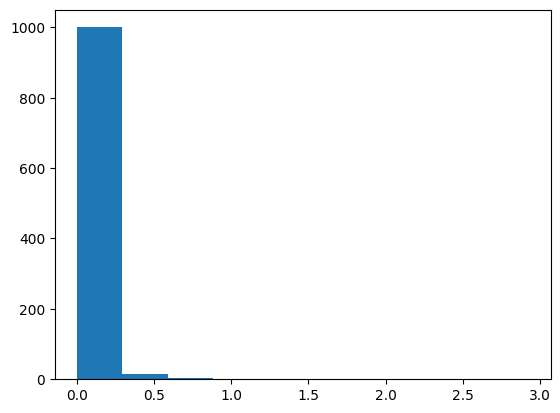

In [114]:
plt.hist(SVD_representation(rama, 15).flatten())

In [ ]:
def SVD_representation(arr, d)